# Clustering & PCA Assignment


Note: Dataset and workbook are in same directory

In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataset

cntry_df=pd.read_csv(r"C:\Users\sohin\Downloads\Country-data.csv",encoding='utf-8',engine='python')

cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Understanding the data

In [3]:
#Check the datatype of the columns

cntry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### As we can see that all columns are numericals except for one column - 'country'

# Data Preparation

#### Cleaning/Handling missing values from the dataset

In [4]:
#Checking of missing values

cntry_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### No missing values, hence we can proceed with our next step for data analysis

# Data Transformation

In [5]:
#Remove the non numerical column, i.e., "Country"

cntry_df.set_index('country',inplace=True)
cntry_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Changing the column 'health', 'imports' and 'exports' percentage of Total GDP into 'health', 'imports' and 'exports' percentage of total gdpp for making dataset complete sense.

In [6]:
# Now changing the per total gdp tp per total gdpp

cntry_df['health']=(cntry_df['health']*cntry_df['gdpp'])/100
cntry_df['imports']=(cntry_df['imports']*cntry_df['gdpp'])/100
cntry_df['income']=(cntry_df['income']*cntry_df['gdpp'])/100
cntry_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200


# Data Visualisation

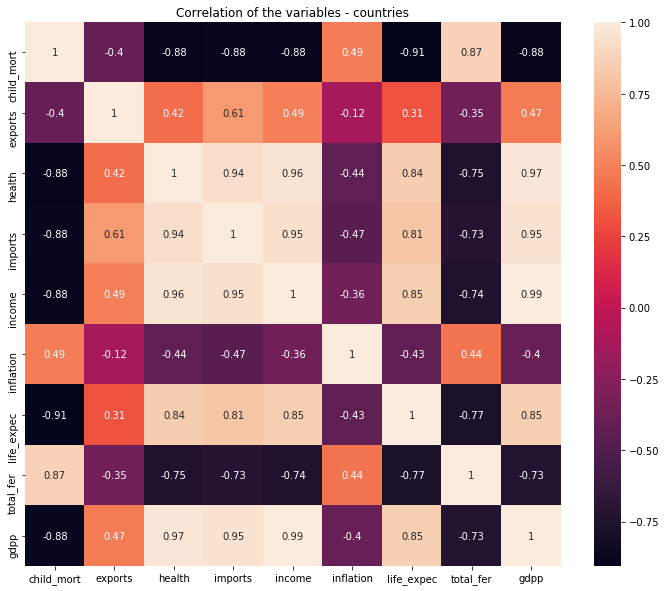

In [7]:
#Plotting heatmap to see the correlation of the dataset

# setting figure size and inline

%matplotlib inline 
plt.figure(figsize=(12,10))

# setting title

plt.title("Correlation of the variables - countries")

# Heatmap plotting

sns.heatmap(cntry_df.corr(method='spearman'),annot=True)   # Method is used 'spearman' for monotonic

plt.show()   # Now showing

#### From the above heatmap, we can see that there are some variables having very high correlation with repect to postive and negative.

This will cause problem for the upcoming analysis, hence need to be removed but they have valuable information which we can't afford to loose. So, we will use PCA to overcome this multicollinearity. This will not only take care of multicollinearity but also will preserve the valuable information and also dimensionality reduction.

## Rescaling the dataset

In [8]:
#Importing the scaling Library - "StandardScaler"

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [9]:
# Scaling the dataset with Standard Scaler 

scaled_df=scaler.fit_transform(cntry_df)
scaled_df=pd.DataFrame(scaled_df,columns=cntry_df.columns)

scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,-0.565040,-0.432276,-0.419624,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.439218,-0.313677,-0.388521,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.484826,-0.353720,-0.375272,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-0.532363,-0.345953,-0.404013,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.178771,0.040735,-0.237868,-0.601749,0.704258,-0.541946,-0.041817


# Applying PCA

In [10]:
#Importing PCA module

from sklearn.decomposition import PCA

pca=PCA(svd_solver='randomized',random_state=42)    # creating an object for PCA

pca.fit(scaled_df)                                  # fitting the dataset with PCA object


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the first two principal components on x-y axes and try to understand the feature sense

In [11]:
# Defining the components in a new dataframe

col_names=list(scaled_df.columns)
pca_df=pd.DataFrame({'PC1': pca.components_[0],'PC2':pca.components_[1], 'Feature':col_names})
pca_df.head()

,PC1,PC2,Feature
0,-0.335127,0.471890,child_mort
1,0.260650,0.196891,exports
2,0.369411,0.174463,health
3,0.356568,0.363929,imports
4,0.361927,0.364126,income


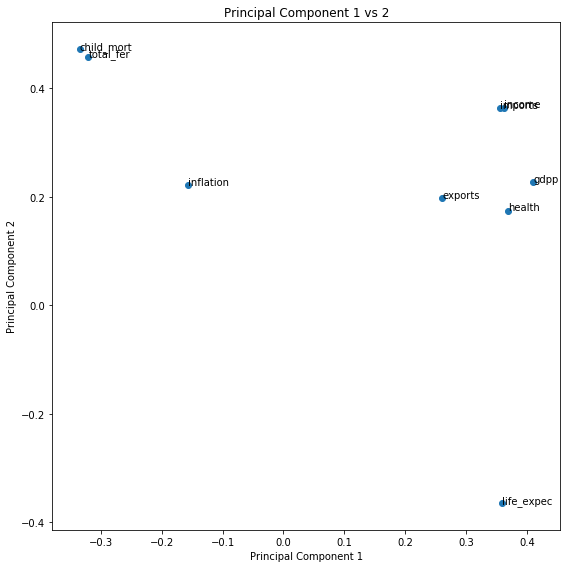

In [12]:
# plotting the two principal components in scatter plot

%matplotlib inline
fig=plt.figure(figsize=(8,8))                 # setting the figure
plt.scatter(pca_df.PC1,pca_df.PC2)            # using scatter plot 
plt.title('Principal Component 1 vs 2')       # setting the title
plt.xlabel('Principal Component 1')           # setting the x-label
plt.ylabel('Principal Component 2')           # setting the x-label

# setting the features name on the datapoints

for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt,(pca_df.PC1[i],pca_df.PC2[i]))
    
plt.tight_layout()    # changing the layout
plt.show()            # showing the plot

We can see that for the first component is in the direction where 'life_expec' is having high value.

#### Let's create screeplot to choose number of components.

In [13]:
pca.explained_variance_ratio_   # check the variance ratio i.e VT

array([0.54475534, 0.1801119 , 0.10224621, 0.09537347, 0.02540409,
       0.02425824, 0.01643517, 0.00943709, 0.0019785 ])

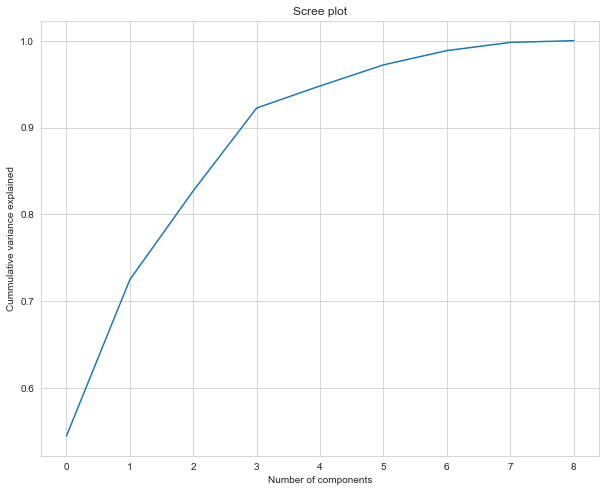

In [14]:
# Screeplot - plotting for cummulative explained_variance_ratio against number of components

# setting the style of the graph and figure size

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))

plt.plot(np.cumsum(pca.explained_variance_ratio_))    # plotting using cumsum

# Labelling the graph on title and axes(X and Y)

plt.title('Scree plot')
plt.xlabel('Number of components')
plt.ylabel('Cummulative variance explained')

plt.show()

From the above screeplot, we can conclude that number of components 5 is best to choose as it is having 97 percent approximately cummulative variance. Which means by choosing 6 we can explain 97% approx of variance.

# Outliers Analysis

In [15]:
round(scaled_df.describe(percentiles=[0.15,0.35,0.55,0.75,0.95]),2)   # creating percentile to check outliers

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.89,-1.50,-0.58,-0.45,-0.42,-1.14,-4.34,-1.19,-0.70
15%,-0.83,-0.80,-0.56,-0.43,-0.42,-0.64,-1.15,-0.93,-0.67
35%,-0.66,-0.48,-0.51,-0.37,-0.41,-0.46,-0.23,-0.64,-0.55
50%,-0.47,-0.22,-0.41,-0.31,-0.38,-0.23,0.29,-0.36,-0.45
55%,-0.35,-0.10,-0.38,-0.29,-0.37,-0.17,0.38,-0.23,-0.38
75%,0.59,0.37,-0.04,0.08,-0.18,0.28,0.70,0.62,0.06
95%,1.93,1.44,2.18,1.20,1.43,1.24,1.22,1.93,1.95


As we can see from the above table, all columns are having outliers.

#### Let's now visualize the dataset to understand the outliers in better way. We will create boxplots for each one of them

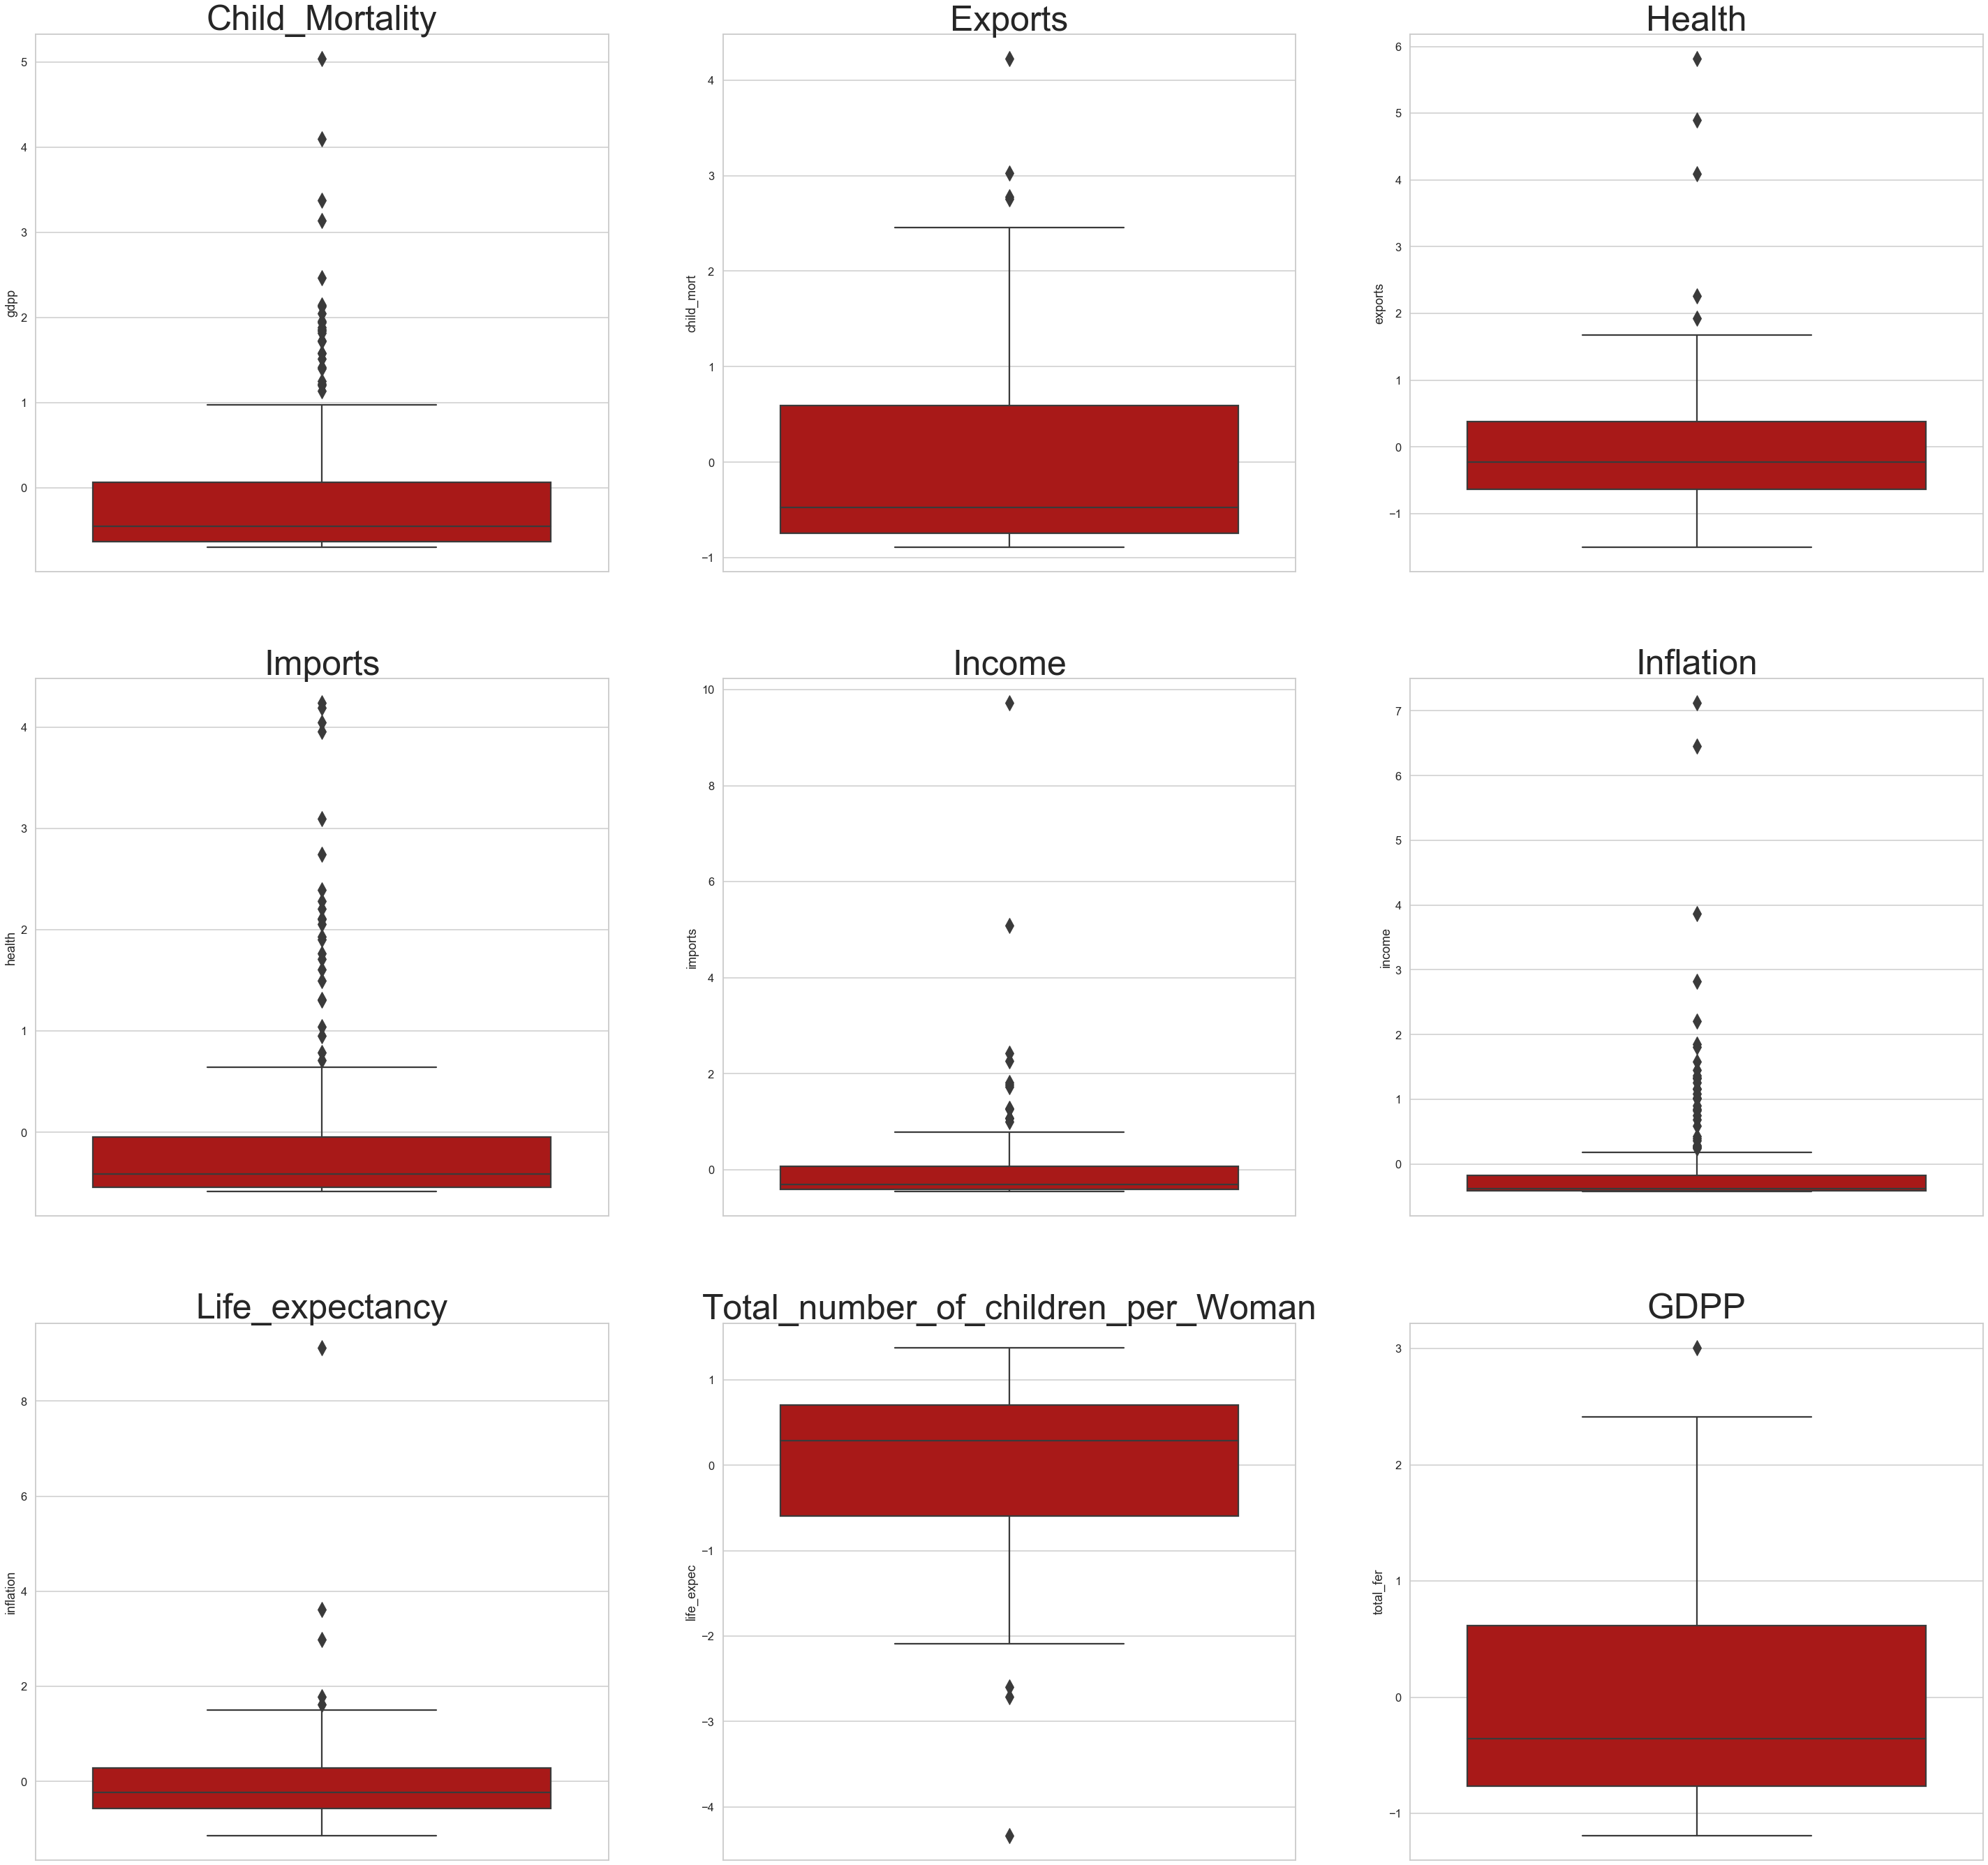

In [16]:
# Setting size of figure, context and gridlines

plt.figure(figsize=(50,150))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title names for the columns in the dataset

col={0:'Child_Mortality',1:'Exports',2:'Health',3:'Imports',4:'Income',5:'Inflation',
     6:'Life_expectancy',7:'Total_number_of_children_per_Woman',8:'GDPP'}

# Visualising the outliers with boxplot for all the variables 

for i in range(9):
    plt.subplot(9,3,i+1)
    plt.title(col[i],fontsize=50)
    sns.boxplot(x=scaled_df.columns[i-1],data=scaled_df,palette='gist_heat',orient='v',fliersize=15)  # using boxplot

From the above boxplot, we can conclude that all the variables/components are having outliers. So, from here we can make a decision that either to keep the outliers or to remove them.

We will use both approach and compare both of the results :

First, we will include outliers and do clustering

Second, we will trim the outliers and do clustering

# Approach 1 : Include Outliers

## K-Means Clustering using PCA

In [17]:
# Importing incremeantal PCA for efficiency

from sklearn.decomposition import IncrementalPCA

pca_final=IncrementalPCA(n_components=5)  # Chossing k=5 as it explains about 97% of variance - visualized from screeplot

In [18]:
# Transformation - getting data on principal components

pca_scaled_df=pca_final.fit_transform(scaled_df)

pca_scaled_df.shape     # shape of the dataset

(167, 5)

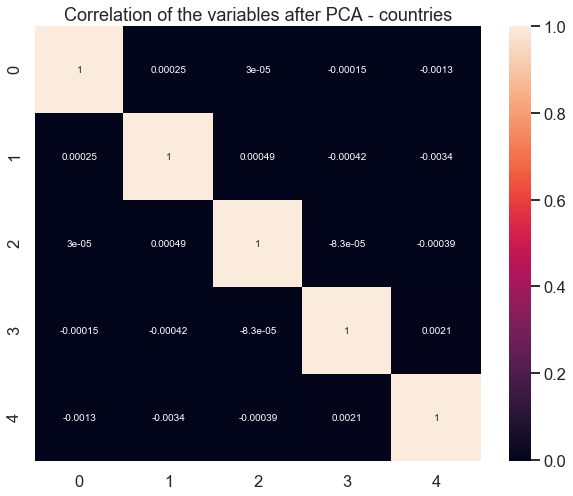

In [19]:
# Checking the correlation of the new dataset(After PCA)

corr_pca=np.corrcoef(pca_scaled_df.transpose())



# now plotting heatmap

%matplotlib inline 
plt.figure(figsize=(10,8))        # setting the figure size

# setting title

plt.title("Correlation of the variables after PCA - countries")

sns.heatmap(corr_pca,annot=True)   # Plotting heatmap

In [20]:
# checking the multicollinearlity - minumum and maximum

corr_pca_minmax = corr_pca - np.diagflat(corr_pca.diagonal())

# printing the min-max values

print("maximum correlation:",corr_pca_minmax.max(), ", minimum correlation: ", corr_pca_minmax.min(),)

maximum correlation: 0.002112142694240379 , minimum correlation:  -0.0033586414825590052


From above heatmap and the calculation we can now say that we have removed the multicollinearlity from our dataset

In [21]:
# Creating new dataframe for the new dataset with new columns names

new_dataset=pd.DataFrame(pca_scaled_df)

new_dataset=new_dataset.rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'PC6'})

new_dataset.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.740399,1.317918,-0.891229,-0.114332,0.158490
1,-0.000356,-1.491489,0.017655,0.013236,-0.216884
2,-0.436012,-0.691619,0.693945,0.701270,0.349321
3,-2.472995,2.328570,0.882692,0.099320,0.764776
4,0.641890,-1.047344,0.131177,-0.390181,0.179997


In [22]:
# importing clustering libraries
import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Silhouette Analysis

In [23]:
# Silhouette analysis


clusters_range=[2,3,4,5,6,7,8,9]                                        # selecting range of clusters
for i in clusters_range:                                                # For loop
    kmeans=KMeans(n_clusters=i,max_iter=500)                            # Using iteration 500 for finding Kmeans
    kmeans.fit(new_dataset)                                             # fitting the kmeans
    cluster_label=kmeans.labels_                                        # saving the labels in a cluster_label list
    
    silhouette_Score=silhouette_score(new_dataset,cluster_label)        # finding the silhouette score 
    
    # Printing for all number of clusters of range(2,10) for silhouette score
    
    print("For no. of cluster={0},silhouette score is {1}".format(i,silhouette_Score))

For no. of cluster=2,silhouette score is 0.436593354493332
For no. of cluster=3,silhouette score is 0.41114240024366144
For no. of cluster=4,silhouette score is 0.4166607876891153
For no. of cluster=5,silhouette score is 0.2970430701052886
For no. of cluster=6,silhouette score is 0.3885620385271955
For no. of cluster=7,silhouette score is 0.2790924078029563
For no. of cluster=8,silhouette score is 0.2869297133457836
For no. of cluster=9,silhouette score is 0.24637804990944706


We will our final model k=4 to use for K-Means clustering as it is appropriate for analysis.

In [24]:
# Final model k=4

kmeans=KMeans(n_clusters=4,max_iter=500,random_state=42)         # k=4 and iteration=500
kmeans.fit(new_dataset)   

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [25]:
# New dataset cluster labels

kmeans.labels_


array([2, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 0,
       3, 0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 2, 0, 3, 2, 3, 0, 0, 2, 2, 0,
       2, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       3, 3, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 3, 0, 2, 0, 3, 0, 0, 2, 0, 3, 3, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2])

In [26]:
# Uploading the cluster labels in our original dataset
cntry_df['Cluster_id']=kmeans.labels_
cntry_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
country,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,2
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,0


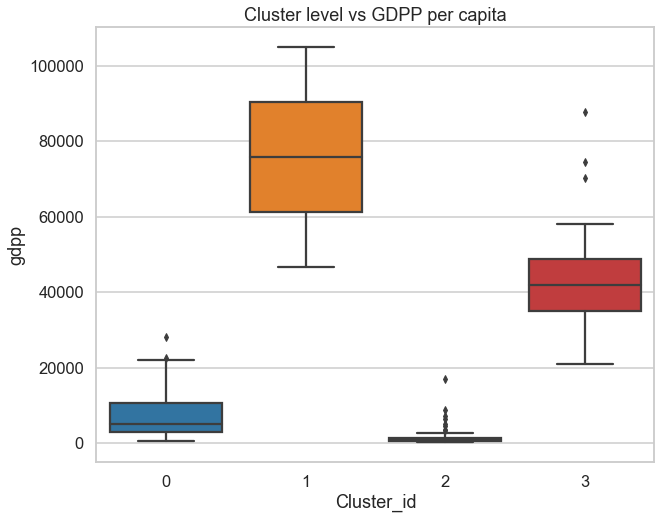

In [27]:
# Visualising the distribution of the cluster labels for column 'gdpp'

plt.figure(figsize=(10,8))
plt.title('Cluster level vs GDPP per capita')
sns.boxplot(x='Cluster_id',y='gdpp',data=cntry_df)


Points to be concluded from above boxplot - gdpp(The GDP per capita) visualization

Cluster label 0 : Most of the countries in this boxplot are having little high gdpp than the very lowest gdpp group

Cluster label 1 : Having highest gdpp than all other cluster labels

Cluster label 2 : Having very low gdpp than all the other cluster labels

Cluster label 3 : Having high gdpp with some outliers

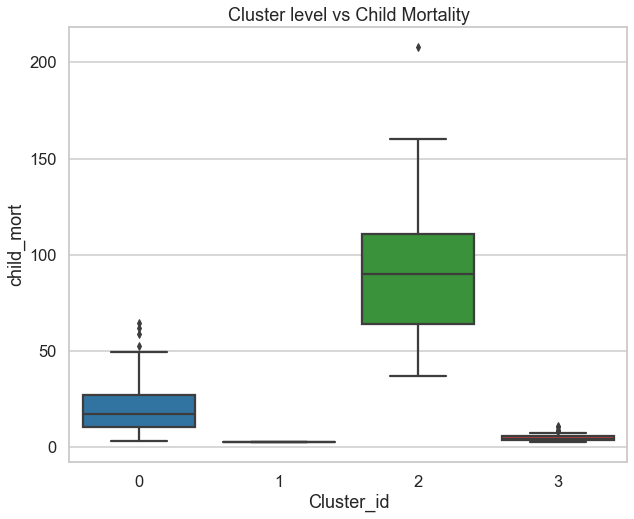

In [28]:
# Visualising the distribution of the cluster labels for column 'child_mort' using boxplot

plt.figure(figsize=(10,8))                    # setting figure size
plt.title('Cluster level vs Child Mortality') # Setting the title

sns.boxplot(x='Cluster_id',y='child_mort',data=cntry_df)  # Using boxplot

Points to be concluded from above boxplot - child_mort(Death of children under 5 years of age per 1000 live births) visualization

Cluster label 0 : Having second highest child mortality with few outliers

Cluster label 1 : Having lowest child mortality than all other cluster labels

Cluster label 2 : Having highest child mortality than rest of the cluster labels

Cluster label 3 : Having low child mortality with few outliers

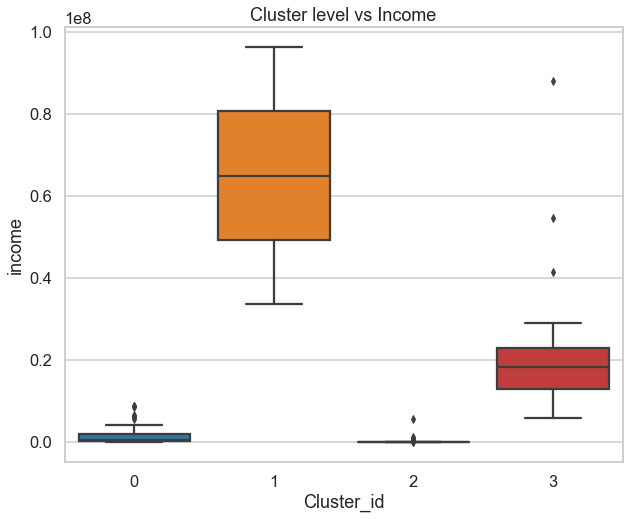

In [29]:
# Visualising the distribution of the cluster labels for column 'income'

plt.figure(figsize=(10,8))
plt.title('Cluster level vs Income')
sns.boxplot(x='Cluster_id',y='income',data=cntry_df)

Points to be concluded from above boxplot - income(Net income per person) visualization

Cluster label 0 : Having second lowest income with few outliers

Cluster label 1 : Having highest income than all other cluster labels

Cluster label 2 : Having lowest income with few outliers than rest of the cluster labels

Cluster label 3 : Having decent income with few outliers

### Visualisation of PC1 and PC2

In [31]:
# Data Transformation of the new_dataset

new_dataset['Cluster_label']=kmeans.labels_     # Adding cluster label to principal components

new_dataset.set_index(cntry_df.index,inplace=True)  # Adding country to the index for the new_dataset

new_dataset.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_label
country,,,,,,
Afghanistan,-2.740399,1.317918,-0.891229,-0.114332,0.158490,2
Albania,-0.000356,-1.491489,0.017655,0.013236,-0.216884,0
Algeria,-0.436012,-0.691619,0.693945,0.701270,0.349321,0
Angola,-2.472995,2.328570,0.882692,0.099320,0.764776,2
Antigua and Barbuda,0.641890,-1.047344,0.131177,-0.390181,0.179997,0


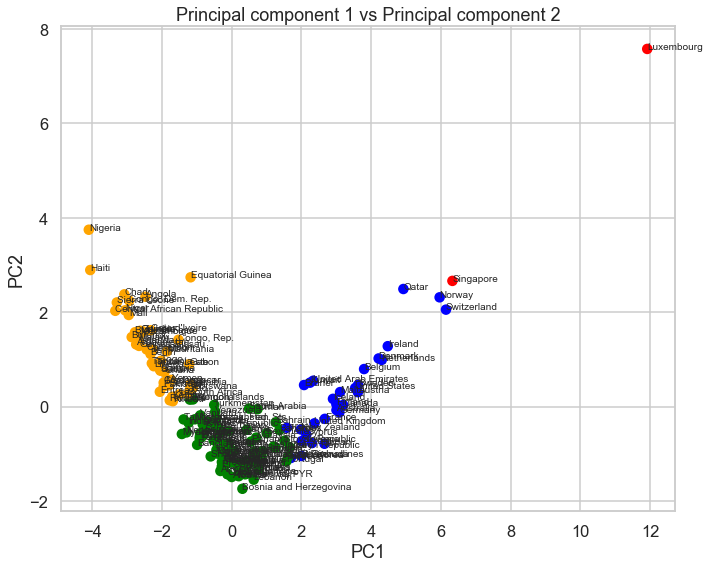

In [32]:
# Visualising the clusters formed by choosing first two pricipal components(on X-Y axes)

%matplotlib inline                  
fig = plt.figure(figsize = (10,8))   # setting the figure size

# setting title

plt.title("Principal component 1 vs Principal component 2")

# Plotting a scatter plot

plt.scatter(new_dataset.iloc[:,0], new_dataset.iloc[:,1],
            c = new_dataset.Cluster_label.map({0:'green',1:'red',2:'orange',3:'blue'}))

# labeling different cluster points with country names 

for i, txt in enumerate(new_dataset.index):
    plt.annotate(txt, (new_dataset.PC1[i],new_dataset.PC2[i]))

# labeling the axes

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()   # changing the layout
plt.show()           # Showing the plot

As we can see from first two principal components(PC1 & PC2), the PC1 is in the direction where the countries need of least help. Here, why we are choosing PC1 because it has maximum percentage of variance explained.

We can see that countries like 'Qatar' and 'Norway' are having high PC1 which means they are doing well, where on other hand countries like 'Singapore' requires urgent need of aid.

Hence from the datapoints of color 'Red' are in direst need of aid than the color in 'Orange'

### Visualizing with original variables (Child_mort vs gdpp)

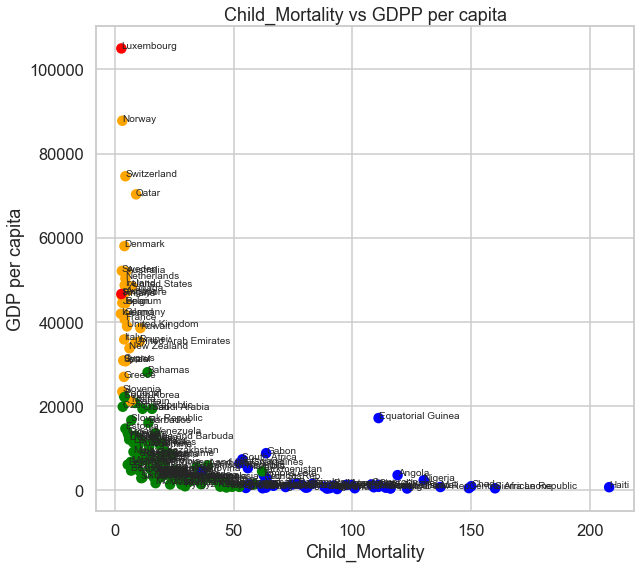

In [33]:
# Visualising the clusters formed with origibal varaibles(on X-Y axes)
%matplotlib inline                  
fig = plt.figure(figsize = (9,8))   # setting the figure size

# Plotting a scatter plot

plt.scatter(cntry_df['child_mort'], cntry_df['gdpp'],
            c = cntry_df.Cluster_id.map({0:'green',1:'red',2:'blue',3:'orange'}))

# labeling different cluster points with country names 

for i, txt in enumerate(cntry_df.index):
    plt.annotate(txt, (cntry_df.child_mort[i],cntry_df.gdpp[i]))

# labeling the axes and title

plt.title('Child_Mortality vs GDPP per capita')
plt.xlabel('Child_Mortality')
plt.ylabel('GDP per capita')

plt.tight_layout()  # changing the layout

plt.show()           # Showing the plot

From the above scatter plot, Two points we can conclude :

Country "Singapore"  and " Luxembourg" is in dire need of aid

Country "Norway" is having good gdp and less child mortality rate

# Insights (K-Means Approach 1)

In [34]:
# Finding the countries with cluster label=1
Country_help=pd.DataFrame(new_dataset[new_dataset['Cluster_label']==1].index)

Country_help.shape

(2, 1)

There are total 2 countries from the dataset need of urgent help/aid as they are having lowest income, high child mortality and low gdp per capita.

Let's Find the countries with highest income, low child mortality and high gdp per capita or the countries that doesn't need aid.

In [35]:
# Finding the countries with cluster label=3

Country_nohelp=pd.DataFrame(new_dataset[new_dataset['Cluster_label']==3].index)

Country_nohelp.shape

(29, 1)

 29 countries is there with good socio-economic and health factors

# Hierarchical Clustering

In [36]:
#  Dropping the old cluster label and saving in new datset

hier_cluster=new_dataset.drop('Cluster_label',1)
hier_cluster.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-2.740399,1.317918,-0.891229,-0.114332,0.158490
Albania,-0.000356,-1.491489,0.017655,0.013236,-0.216884
Algeria,-0.436012,-0.691619,0.693945,0.701270,0.349321
Angola,-2.472995,2.328570,0.882692,0.099320,0.764776
Antigua and Barbuda,0.641890,-1.047344,0.131177,-0.390181,0.179997


In [37]:
# Importing labraries for hierarchical clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

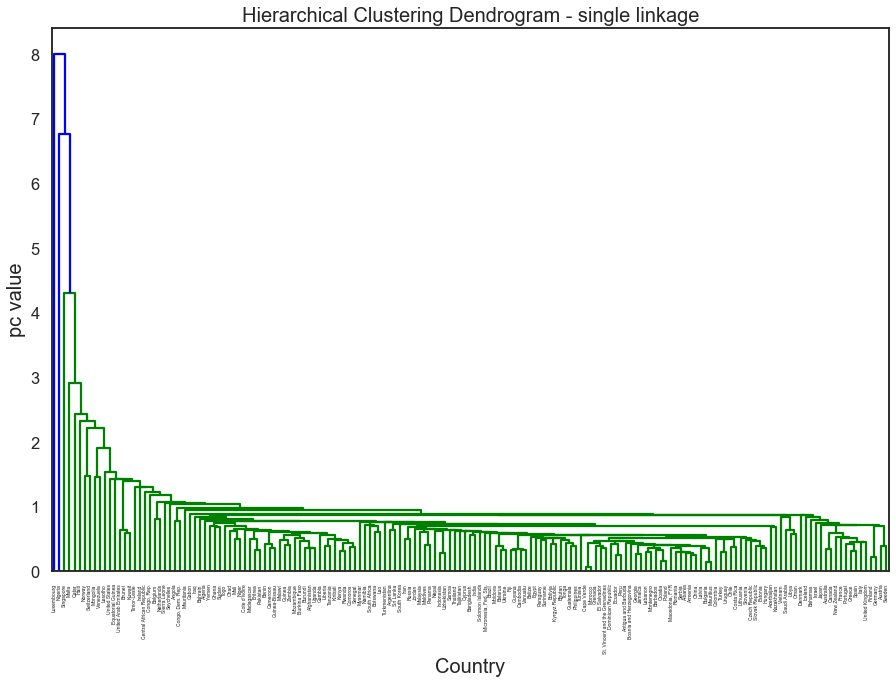

In [38]:
# First we will try with single linkage
# setting the figure and graph style

plt.figure(figsize=(15,10))
sns.set_style('white')

# setting the labels on axes and title

plt.title('Hierarchical Clustering Dendrogram - single linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)

single_linkage=linkage(hier_cluster,method='single',metric='euclidean')   # single linkage
dendrogram(single_linkage,labels=hier_cluster.index)                      # creating dendrogram
plt.show()                                                                # plot showing

It's not clearly visible in single linkage dendogram hence we will go for complete linkage which gives us proper results.

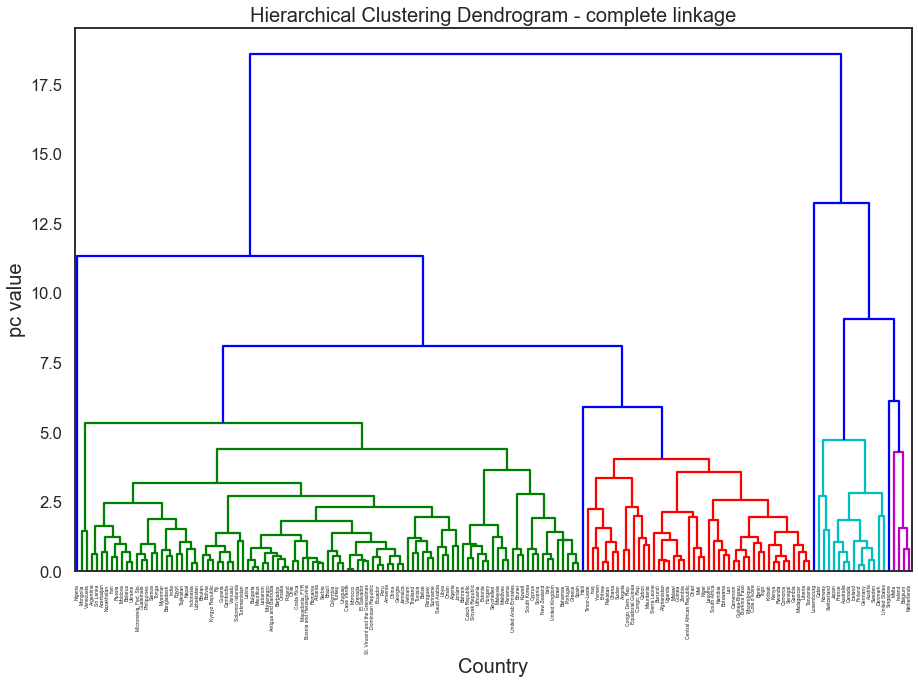

In [39]:
# Complete linkage

# setting the figure and graph style

plt.figure(figsize=(15,10))                                                                             # Setting the size of the figure
sns.set_style('white')                                                                                  # Setting style

# setting the labels on axes and title

plt.title('Hierarchical Clustering Dendrogram - complete linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)


complete_linkage=linkage(hier_cluster,method='complete',metric='euclidean')                             # single linkage
dendrogram(complete_linkage,above_threshold_color='blue',color_threshold=5.5,labels=hier_cluster.index) # creating dendrogram

plt.show()                                                                                              # plot showing

Taking reference from the above dendrogram we will cut in 3 clusters

In [40]:
# Applying 3 clusters
cluster_label=cut_tree(complete_linkage,n_clusters=3).reshape(-1, )  # using cut_tree for selecting number of clusters

cluster_label


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [41]:
# Asssigning the cluster labels to the dataset
hier_cluster['Cluster_label']=cluster_label

hier_cluster.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_label
country,,,,,,
Afghanistan,-2.740399,1.317918,-0.891229,-0.114332,0.158490,0
Albania,-0.000356,-1.491489,0.017655,0.013236,-0.216884,0
Algeria,-0.436012,-0.691619,0.693945,0.701270,0.349321,0
Angola,-2.472995,2.328570,0.882692,0.099320,0.764776,0
Antigua and Barbuda,0.641890,-1.047344,0.131177,-0.390181,0.179997,0


### Visualisation of Hierarchical clustering PC1 & PC2

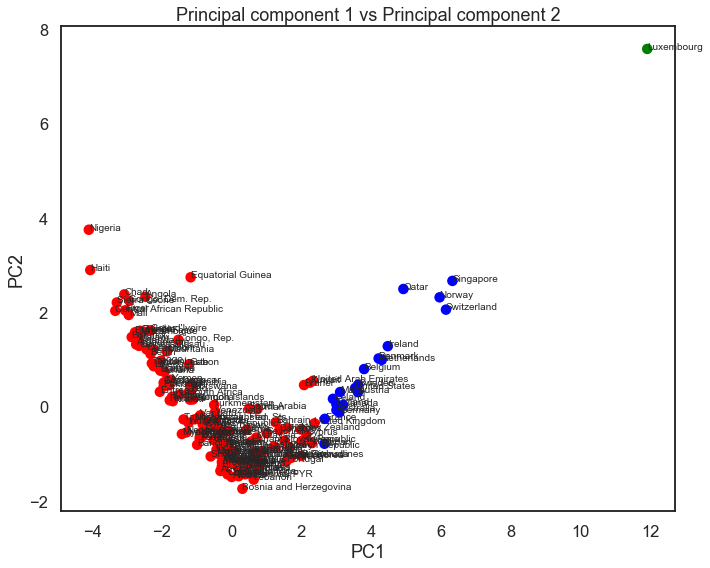

In [42]:
# Visualising the clusters formed by choosing first two pricipal components(on X-Y axes)

%matplotlib inline                  
fig = plt.figure(figsize = (10,8))   # setting the figure size

# setting title

plt.title("Principal component 1 vs Principal component 2")

# Plotting a scatter plot

plt.scatter(hier_cluster.iloc[:,0], hier_cluster.iloc[:,1],
            c = hier_cluster.Cluster_label.map({0:'red',1:'blue',2:'green'}))

# labeling different cluster points with country names 

for i, txt in enumerate(hier_cluster.index):
    plt.annotate(txt, (hier_cluster.PC1[i],hier_cluster.PC2[i]))

# labeling the axes

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()   # changing the layout
plt.show()           # Showing the plot


As we can see from first two principal components(PC1 & PC2), the PC1 is in the direction where the countries need of least help. Here, why we are choosing PC1 because it has maximum percentage of variance explained. The 'Red' color datapoints of countries need help in aid but the 'Blue' one not required.

In [43]:
# Analysing cluster by comparing [gdpp,child_mort and income] - how they vary in hierarchical clustering

cntry_df_hier=cntry_df.drop('Cluster_id',1)    # creating separate dataset for hierarchical cluster analysis

# Imputing the new hierarchical clusters in the dataset

cntry_df_hier['Cluster_level']=cluster_label

cntry_df_hier.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_level
country,,,,,,,,,,
Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,0


### Visualization of original variables(Child mortality, Income and Gdpp)

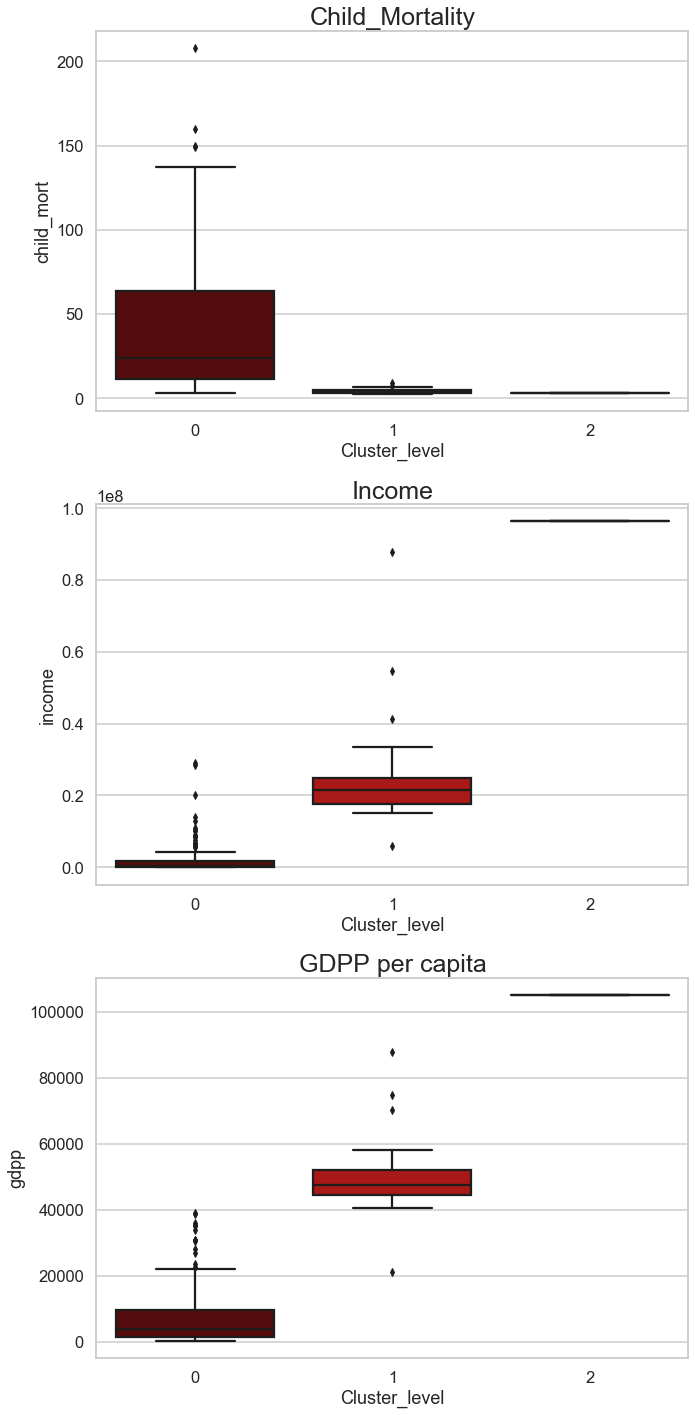

In [44]:
# Setting size of figure, context and gridlines

plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')


# Visualising the outliers with boxplot for child_mort, income and gdpp variables 



plt.subplot(3,1,1)                          # creating subplots
plt.title('Child_Mortality',fontsize=25)   # giving title with font size

# creating boxplot

sns.boxplot(x=cntry_df_hier['Cluster_level'],y=cntry_df_hier['child_mort'],data=cntry_df_hier,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,2)                         # creating subplots
plt.title('Income',fontsize=25)            # giving title with font size

# creating boxplot
sns.boxplot(x=cntry_df_hier['Cluster_level'],y=cntry_df_hier['income'],data=cntry_df_hier,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,3)                           # creating subplots
plt.title('GDPP per capita',fontsize=25)       # giving title with font size

# creating boxplot
sns.boxplot(x=cntry_df_hier['Cluster_level'],y=cntry_df_hier['gdpp'],data=cntry_df_hier,palette='gist_heat',orient='v',fliersize=5)
             
plt.tight_layout()                      # setting the layout for better visual


#### Valuable Insights from above three boxplots :

For cluster 0: gdpp and income is the lowest than other clusters, Mortality of children is very high than other clusters.

For cluster 1: Behaving normally in all departments(income, gdpp and children mortality) except for some outliers.

For cluster 2: gdpp and income is higher than other clusters, Mortality of children is very less compared to other clusters.

# Insights(Hierarchical Approach 1)

In [45]:
# Finding the countries with cluster label=o as it shows they are not developed

Country_help_hier=pd.DataFrame(hier_cluster[hier_cluster['Cluster_label']==0].index)

Country_help_hier.shape

(147, 1)

# Conclusion - Approach 1

## K-Means vs Hierarchical Clustering

#### K-means clustering :

Countries that are direst need of aid
-Total 2 countries are in this category -  Luxembourg and Singapore

Countries that are having good socio-economic and health factors
-Total 29 countries are in this category

#### Hierarchical clustering :

Countries that are direst need of aid
-Total 147 countries are in this category

Countries that are having good socio-economic and health factors
-1 country is in this category - Luxembourg

# Approach 2 : Exclude outliers

In [46]:
# Removing statistical ouliers from the dataset from all the columns
new_scaled_df=scaled_df

col=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

# using IQR method to remove the outliers

for i in range(len(col)):
    lower=new_scaled_df[col[i]].quantile(0.05)   # selecting lower quartile
    upper=new_scaled_df[col[i]].quantile(0.95)   # selecting higher quartile
    IQR=upper-lower                                 
    
    # storing new dataset with removed extreme outliers
    
    new_scaled_df=new_scaled_df[(new_scaled_df[col[i]] >=lower - 1.5*IQR) & (new_scaled_df[col[i]] <=upper + 1.5*IQR)]

## K-Means clustering using PCA

In [47]:
# Importing incremeantal PCA for efficiency
from sklearn.decomposition import IncrementalPCA

pca_final1=IncrementalPCA(n_components=5)  # Chossing k=5 as it explains about 98% of variance - visualized from screeplot

In [48]:
# Transformation - getting data on principal components

new_pca_scaled=pca_final1.fit_transform(new_scaled_df)

new_pca_scaled.shape     # shape of the dataset

(163, 5)

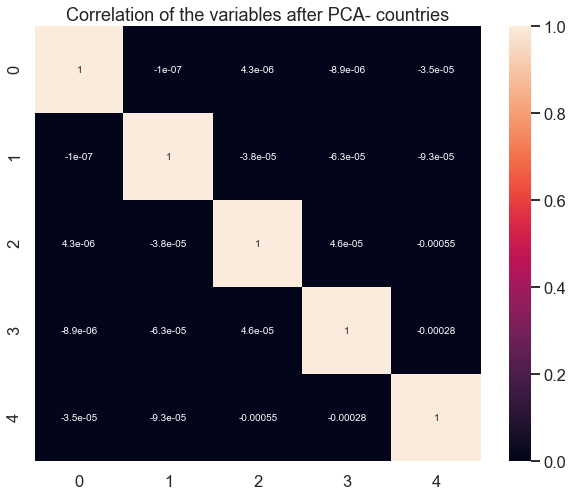

In [49]:
# Checking the correlation of the new dataset(After PCA)
corr_pca1=np.corrcoef(new_pca_scaled.transpose())

# now plotting heatmap

%matplotlib inline 
plt.figure(figsize=(10,8))        # setting the figure size

# setting title
plt.title("Correlation of the variables after PCA- countries")

sns.heatmap(corr_pca1,annot=True)   # Plotting heatmap

In [50]:
# checking the multicollinearlity - minumum and maximum
corr_pca_minmax = corr_pca1 - np.diagflat(corr_pca1.diagonal())
print("maximum correlation:",corr_pca_minmax.max(), ", minimum correlation: ", corr_pca_minmax.min(),)

maximum correlation: 4.63798714382687e-05 , minimum correlation:  -0.0005498695277174907


From above heatmap and the calculation we can now say that we have removed the multicollinearlity from our dataset

In [51]:
#From above heatmap and the calculation we can now say that we have removed the multicollinearlity from our dataset
new_scaled_data=pd.DataFrame(new_pca_scaled)

new_scaled_data=new_scaled_data.rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'PC6'})

new_scaled_data.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.847871,1.144788,-0.494701,0.023511,0.236525
1,0.401720,-1.240176,-0.633937,-0.196395,-0.048374
2,-0.134213,-0.891289,-0.023847,0.881207,0.331817
3,-2.801301,1.306709,1.518211,0.998792,0.408088
4,0.890923,-0.800705,-0.028707,-0.432520,0.288040


## Silhouette Analysis

In [52]:
# Saving the old dataset in new dataset by reseting the index and removing the old cluster labels

cntry_df=cntry_df.reset_index()
new_cntry_df=cntry_df.iloc[new_scaled_df.index]

new_cntry_df=new_cntry_df.drop(['Cluster_id'],1)

In [53]:
# importing clustering libraries
import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [54]:
# Silhouette analysis
clusters_range=[2,3,4,5,6,7,8,9]
for i in clusters_range:
    kmeans_new=KMeans(n_clusters=i,max_iter=500)                            # Using iteration 500 for finding Kmeans
    kmeans_new.fit(new_scaled_data)                                             # fitting the kmeans
    cluster_labels=kmeans_new.labels_                                        # saving the labels in a cluster_label list
    
    silhouette_Score=silhouette_score(new_scaled_data,cluster_labels)        # finding the silhouette score 
    
    # Printing for all number of clusters of range(2,10) for silhouette score
    
    print("For no. of cluster={0},silhouette score is {1}".format(i,silhouette_Score))

For no. of cluster=2,silhouette score is 0.3507326854603918
For no. of cluster=3,silhouette score is 0.41857036725144303
For no. of cluster=4,silhouette score is 0.31304661234671444
For no. of cluster=5,silhouette score is 0.30498907842026407
For no. of cluster=6,silhouette score is 0.2853995119681236
For no. of cluster=7,silhouette score is 0.25957833380761797
For no. of cluster=8,silhouette score is 0.28999932286993296
For no. of cluster=9,silhouette score is 0.2780972688215303


In [55]:
# Now, initiating k-means clustering

# Final model k=3

kmeans_2=KMeans(n_clusters=3,max_iter=500,random_state=42)         # k=3 and iteration=500
kmeans_2.fit(new_scaled_data)                          # fitting the dataset


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [56]:
# New dataset cluster labels

kmeans_2.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1,
       2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 2, 2])

In [57]:
# Uploading the cluster labels in our original dataset

new_cntry_df['Cluster_id']=kmeans_2.labels_
new_cntry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,0


# Visualization with PC1 and PC2

In [58]:
# Data Transformation of the new_dataset

new_scaled_data['Cluster_label']=kmeans_2.labels_     # Adding cluster label to principal components

new_scaled_data.set_index(new_cntry_df.country,inplace=True)  # Adding country to the index for the new_dataset

new_scaled_data.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_label
country,,,,,,
Afghanistan,-2.847871,1.144788,-0.494701,0.023511,0.236525,2
Albania,0.401720,-1.240176,-0.633937,-0.196395,-0.048374,0
Algeria,-0.134213,-0.891289,-0.023847,0.881207,0.331817,0
Angola,-2.801301,1.306709,1.518211,0.998792,0.408088,2
Antigua and Barbuda,0.890923,-0.800705,-0.028707,-0.432520,0.288040,0


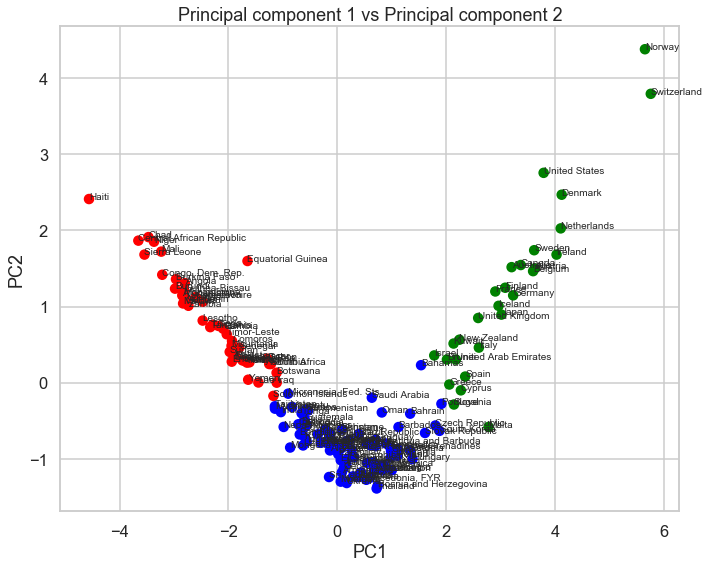

In [59]:
# Visualising the clusters formed by choosing first two pricipal components(on X-Y axes)
%matplotlib inline                  
fig = plt.figure(figsize = (10,8))   # setting the figure size

# setting title

plt.title("Principal component 1 vs Principal component 2")

# Plotting a scatter plot

plt.scatter(new_scaled_data.iloc[:,0], new_scaled_data.iloc[:,1],
            c = new_scaled_data.Cluster_label.map({0:'blue',1:'green',2:'red'}))

# labeling different cluster points with country names 

for i, txt in enumerate(new_scaled_data.index):
    plt.annotate(txt, (new_scaled_data.PC1[i],new_scaled_data.PC2[i]))

# labeling the axes

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()   # changing the layout
plt.show()           # Showing the plot

As we can see from first two principal components(PC1 & PC2), the PC1 is in the direction where the countries need of least help. Here, why we are chossing PC1 because it has maximum percentage of variance explained. The 'Red' color datapoints of countries need urgent help in aid but the 'Blue' one not required.

## Visualisation of original variables(gdpp, income and child_mort)

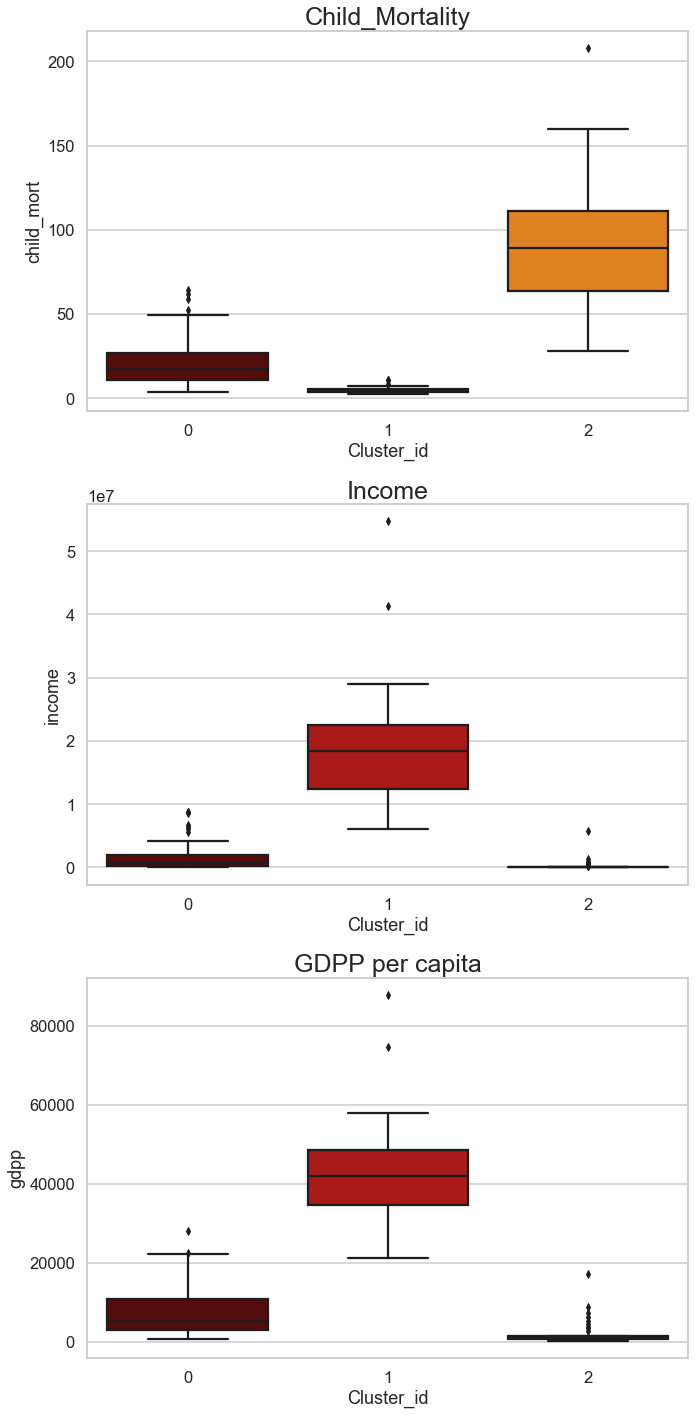

In [60]:
# Setting size of figure, context and gridlines
plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')


# Visualising with boxplot for child_mort, income and gdpp variables 



plt.subplot(3,1,1)                          # creating subplots
plt.title('Child_Mortality',fontsize=25)   # giving title with font size

# creating boxplot

sns.boxplot(x=new_cntry_df['Cluster_id'],y=new_cntry_df['child_mort'],data=new_cntry_df,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,2)                         # creating subplots
plt.title('Income',fontsize=25)            # giving title with font size

# creating boxplot
sns.boxplot(x=new_cntry_df['Cluster_id'],y=new_cntry_df['income'],data=new_cntry_df,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,3)                           # creating subplots
plt.title('GDPP per capita',fontsize=25)       # giving title with font size

# creating boxplot
sns.boxplot(x=new_cntry_df['Cluster_id'],y=new_cntry_df['gdpp'],data=new_cntry_df,palette='gist_heat',orient='v',fliersize=5)
             
plt.tight_layout()                      # setting the layout for better visual

#### Valuable Insights from above three boxplots :

For cluster 0: Having little higher gdpp and income than cluster 1 and child mortality also acts same.

For cluster 1: gdpp and income is higher than other clusters, Mortality of children is very less compared to other clusters.

For cluster 2: gdpp and income is the lowest than other clusters, Mortality of children is very high than other clusters.

# Insights (K-Means Approach 2)

In [61]:
# finding the countries with cluster label 2 as it denotes not developed countries

Country_help1=pd.DataFrame(new_scaled_data[new_scaled_data['Cluster_label']==2].index)
Country_help1.shape

(47, 1)

There are total 47 countries from the dataset are in need of urgent help/aid as they are having lowest income, high child mortality and low gdp per capita.

In [62]:
# Finding the countries with cluster label=3 as it denotes with developed countries
Country_nohelp1=pd.DataFrame(new_scaled_data[new_scaled_data['Cluster_label']==1].index)

Country_nohelp1.shape

(28, 1)

There are 28 countries having good socio-economic and health factors.

## Hierarchical Clustering

In [63]:
# Creating new dataset for hierarchical clustering by removing old cluster label

hier_cluster1=new_scaled_data.drop('Cluster_label',1)
hier_cluster1.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-2.847871,1.144788,-0.494701,0.023511,0.236525
Albania,0.401720,-1.240176,-0.633937,-0.196395,-0.048374
Algeria,-0.134213,-0.891289,-0.023847,0.881207,0.331817
Angola,-2.801301,1.306709,1.518211,0.998792,0.408088
Antigua and Barbuda,0.890923,-0.800705,-0.028707,-0.432520,0.288040


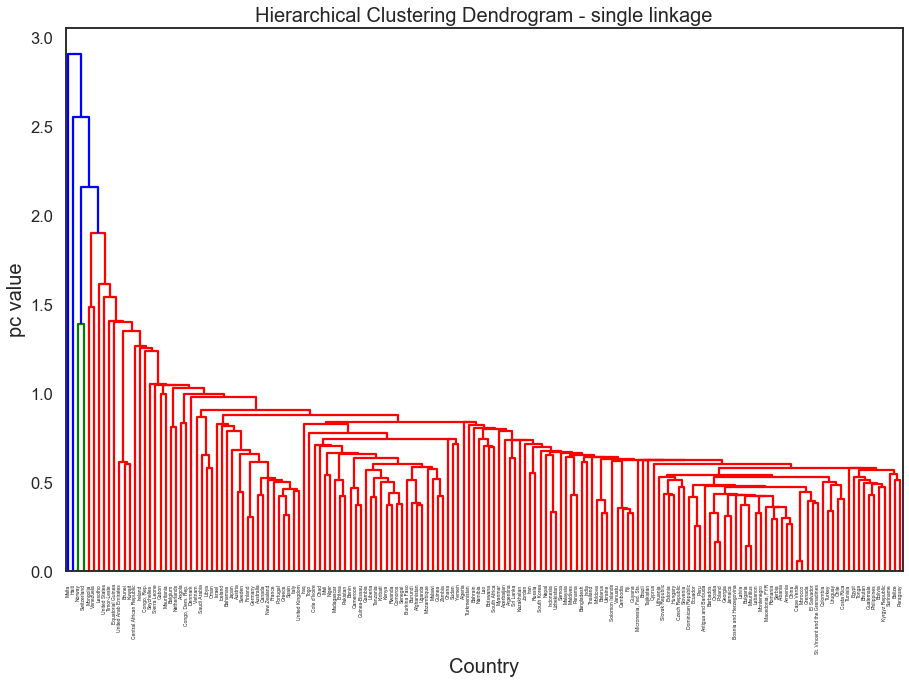

In [64]:
# First we will try with single linkage
# setting the figure and graph style

plt.figure(figsize=(15,10))
sns.set_style('white')

# setting the labels on axes and title

plt.title('Hierarchical Clustering Dendrogram - single linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)

single_linkage1=linkage(hier_cluster1,method='single',metric='euclidean')   # single linkage
dendrogram(single_linkage1,labels=hier_cluster1.index)                      # creating dendrogram
plt.show()                                                                # plot showing

It's not clearly visible in single linkage dendogram hence we will go for complete linkage which gives us proper results.

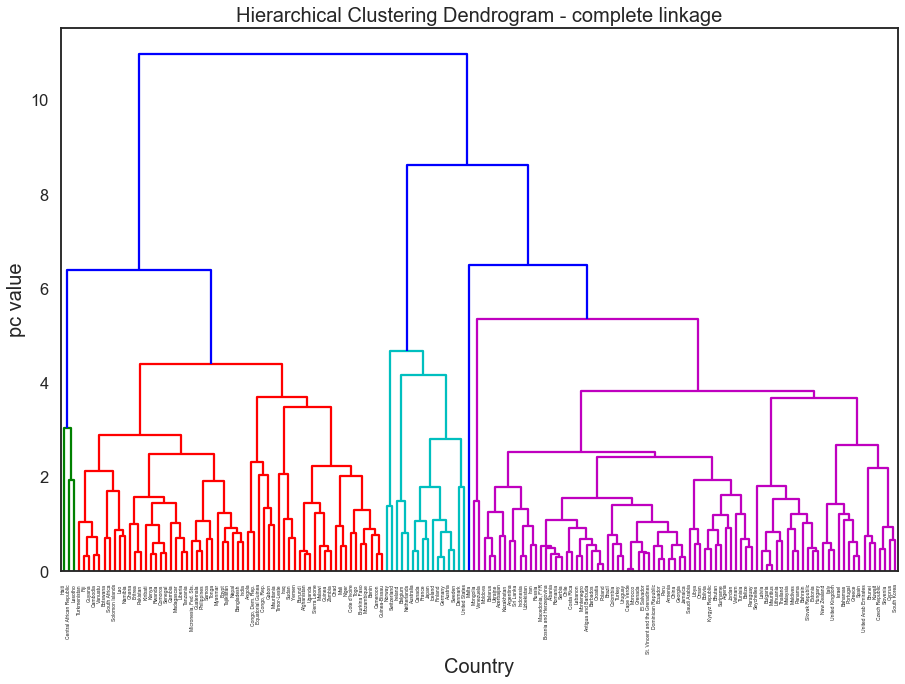

In [65]:
# Complete linkage
plt.figure(figsize=(15,10))             # Setting the size of the figure
sns.set_style('white')                  # Setting style

# setting the labels on axes and title

plt.title('Hierarchical Clustering Dendrogram - complete linkage',fontsize=20)
plt.xlabel('Country',fontsize=20)
plt.ylabel('pc value',fontsize=20)

complete_linkage1=linkage(hier_cluster1,method='complete',metric='euclidean')                             # single linkage
dendrogram(complete_linkage1,above_threshold_color='blue',color_threshold=5.5,labels=hier_cluster1.index) # creating dendrogram

plt.show()                                                                                              # plot showing

In [66]:
# 3 clusters
cluster_label1=cut_tree(complete_linkage1,n_clusters=3).reshape(-1, )

cluster_label1

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 2, 1, 1, 0, 1, 1, 0, 0])

In [67]:
# Asssigning the cluster labels to the dataset(countries)
hier_cluster1['Cluster_label']=cluster_label1

hier_cluster1.head()

,PC1,PC2,PC3,PC4,PC5,Cluster_label
country,,,,,,
Afghanistan,-2.847871,1.144788,-0.494701,0.023511,0.236525,0
Albania,0.401720,-1.240176,-0.633937,-0.196395,-0.048374,1
Algeria,-0.134213,-0.891289,-0.023847,0.881207,0.331817,1
Angola,-2.801301,1.306709,1.518211,0.998792,0.408088,0
Antigua and Barbuda,0.890923,-0.800705,-0.028707,-0.432520,0.288040,1


## Visualising the original variables for hierarchical clustering - Approach 2

In [68]:
# Analysing cluster by comparing [gdpp,child_mort and income] - how they vary in hierarchical clustering 

cntry_df_hier1=new_cntry_df.drop('Cluster_id',1)    # creating separate dataset for hierarchical cluster analysis

# Imputing the new hierarchical clusters in the dataset

cntry_df_hier1['Cluster_level']=cluster_label1

cntry_df_hier1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_level
0,Afghanistan,90.2,10.0,41.9174,248.297,8903.3,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,267.8950,1987.740,406137.0,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,185.9820,1400.440,575340.0,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,100.6050,1514.370,208270.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,735.6600,7185.800,2330200.0,1.44,76.8,2.13,12200,1


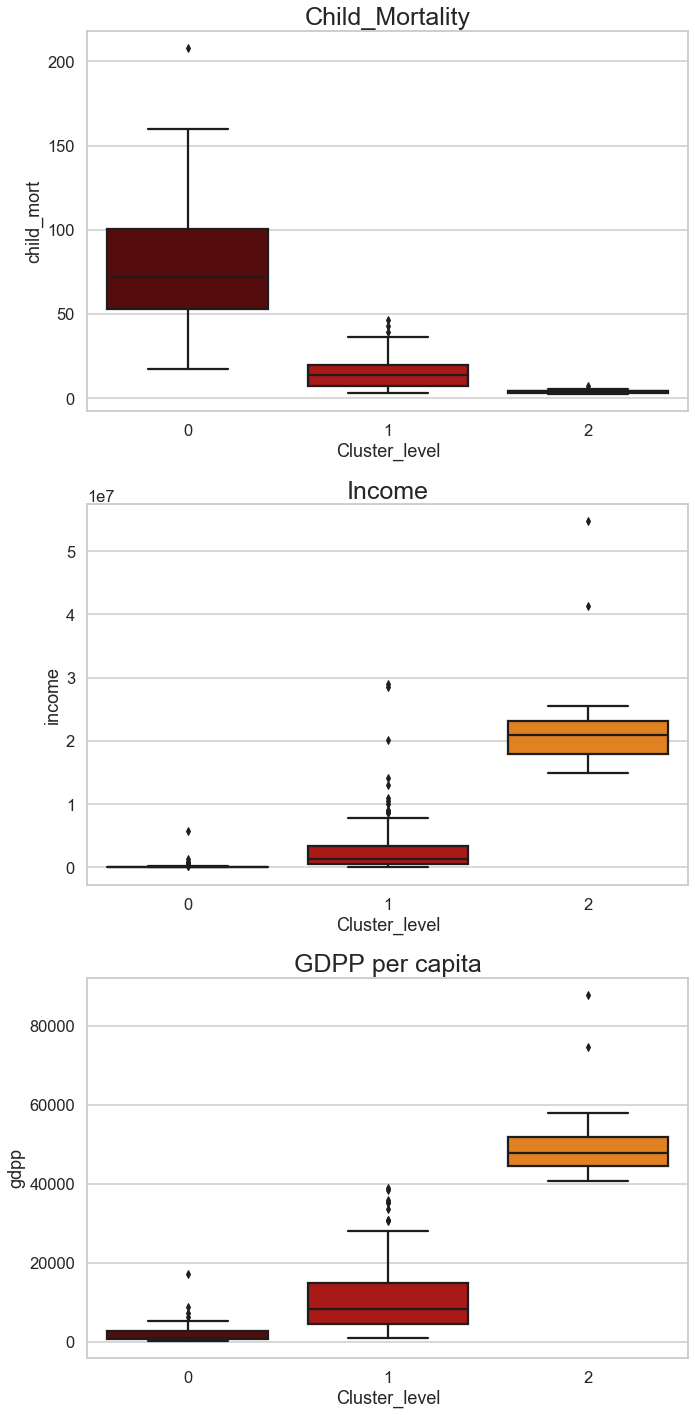

In [69]:
# Setting size of figure, context and gridlines
plt.figure(figsize=(10,20))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')


# Visualising the outliers with boxplot for child_mort, income and gdpp variables 



plt.subplot(3,1,1)                          # creating subplots
plt.title('Child_Mortality',fontsize=25)   # giving title with font size

# creating boxplot

sns.boxplot(x=cntry_df_hier1['Cluster_level'],y=cntry_df_hier1['child_mort'],data=cntry_df_hier1,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,2)                         # creating subplots
plt.title('Income',fontsize=25)            # giving title with font size

# creating boxplot
sns.boxplot(x=cntry_df_hier1['Cluster_level'],y=cntry_df_hier1['income'],data=cntry_df_hier1,palette='gist_heat',orient='v',fliersize=5)

plt.subplot(3,1,3)                           # creating subplots
plt.title('GDPP per capita',fontsize=25)       # giving title with font size

# creating boxplot
sns.boxplot(x=cntry_df_hier1['Cluster_level'],y=cntry_df_hier1['gdpp'],data=cntry_df_hier1,palette='gist_heat',orient='v',fliersize=5)
             
plt.tight_layout()                      # setting the layout for better visual

#### Valuable Insights from above three boxplots :

For cluster 0: .gdpp and income is the lowest than others clusters, Mortality of children is very high than other clusters.

For cluster 1: gdpp and income is having decent low value, mortality of children is high in here, the 4th quartile is larger than others

For cluster 2: gdpp and income is higher than others clusters, Mortality of children is very less compared to other clusters

# Visualising the PC1 and PC2 for hierarchical clustering - Approach 2

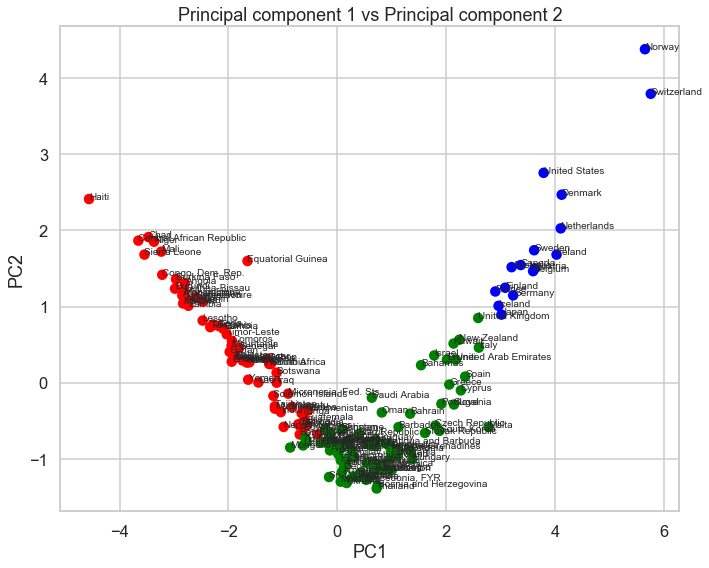

In [70]:
# Visualising the clusters formed by choosing first two pricipal components(on X-Y axes)

%matplotlib inline                  
fig = plt.figure(figsize = (10,8))   # setting the figure size

# setting title

plt.title("Principal component 1 vs Principal component 2")

# Plotting a scatter plot

plt.scatter(hier_cluster1.iloc[:,0], hier_cluster1.iloc[:,1],
            c = hier_cluster1.Cluster_label.map({0:'red',1:'green',2:'blue'}))

# labeling different cluster points with country names 

for i, txt in enumerate(hier_cluster1.index):
    plt.annotate(txt, (hier_cluster1.PC1[i],hier_cluster1.PC2[i]))

# labeling the axes

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()   # changing the layout
plt.show()           # Showing the plot

As we can see from first two principal components(PC1 & PC2), the PC1 is in the direction where the countries need of least help. Here, why we are choosing PC1 because it has maximum percentage of variance explained. The 'Red' color datapoints of countries need urgent help in aid but the 'Blue' one not required.

## Insights - (Hierarchical Approach 2)

In [71]:
# Finding the countries with cluster label=0

Country_help_hier1=pd.DataFrame(hier_cluster1[hier_cluster1['Cluster_label']==0].index)

Country_help_hier1.shape

(63, 1)

Here, we got 63 countries which are in need of aid as they have having low income, high child mortality and low gdp per capita.

In [72]:
# Finding the countries with cluster label=2

Country_nohelp_hier1=pd.DataFrame(hier_cluster1[hier_cluster1['Cluster_label']==2].index)

Country_nohelp_hier1.shape

(16, 1)

Here, we got 16 countries which are having good social-economic and health factors.

# Conclusion - Approach 2

## K-Means vs Hierarchical Clustering

#### K-means clustering :

Countries that are direst need of aid
-Total 47 countries are in this category

### Hierarchical clustering :

Countries that are direst need of aid
-Total 63 countries are in this category

We have seen from both methods - (K-Means and Hierarchical clustering) that extra 9 countries are adding through hierarchical clustering. I would choose the final countries from hierarchical clustering as it gave accurate output than k-means clustering. I have compared the clusters and visualized from both methods and hierarchical clustering gave precise information than K-Means clustering.

# Final Conclusion

Among the two conclusion drawn from approach 1 i.e. including ouliers and approach 2 i.e. excluding outliers, approach 1 is the appropriate choice because it includes all the data points including outliers. As per the business requirements, we have to find all the countries which are in direst need of aid i.e. the countries which are having low socio-economic and health factors. Hence we can't exclude any countries from our dataset as it will create a major drawback in our model. If we exclude this outlier from my dataset, we will miss our main objective as it happened with approach 2. So, even though the model was greater than the previous model, we can't use it as it doesn't suits the business needs. Selecting approach 2 means we have to loose many countries in process which is not ideal from business prespective.



The final list of 2 countries name needs to focus on the most are mentioned below :

Singapore

Luxembourg